# Check consistency
## Goal

This file enables the execution of some examples extracted from `pm/dataviz2/99_sandbox.md` to ensure :
- the same code run 
- and give the sames outputs

While using those runtime scenarios : 
- the `pm-codex` system
- a local instance of Jupyter 
- a typical `python3 <filename.py>` execution

## Preliminary requirements
- Installing Python and the necessary libraries (`matplotlib` and `bokeh`).
- Refer to [the Python installation documentation](https://maths.pm/pm/dataviz2/01_installing_python.md) (specific for this course).


## Python version: ideal case


**Executing**

```python
import sys
print(sys.version_info)
``` 

**Should display**
```bash
sys.version_info(major=3, minor=13, micro=5, releaselevel='final', serial=0)

```



## Checking current version used
**See code below and compare its output with the above mentions**

In [28]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=13, micro=5, releaselevel='final', serial=0)


## Versions

In [18]:
import matplotlib
import bokeh
import numpy as np
import pandas as pd

print(f"matplotlib: {matplotlib.__version__}")
print(f"bokeh: {bokeh.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")

# For all matplotlib dependencies
import matplotlib
for dep in ['numpy', 'python-dateutil', 'pyparsing', 'cycler']:
    try:
        mod = __import__(dep.replace('-', '_'))
        print(f"{dep}: {mod.__version__}")
    except:
        pass

# For bokeh dependencies  
import sys
print(f"python: {sys.version.split()[0]}")

matplotlib: 3.10.5
bokeh: 3.8.0
numpy: 2.3.2
pandas: 2.3.2
numpy: 2.3.2
pyparsing: 3.2.3
cycler: 0.12.1
python: 3.13.5


## Tests with code from `dataviz2/99_sandbox.md` 
**Titles used below are the same than in the above mentioned markdown file**

### `matplotlib` (+ `pandas`) examples

#### Simple `matplotlib` example

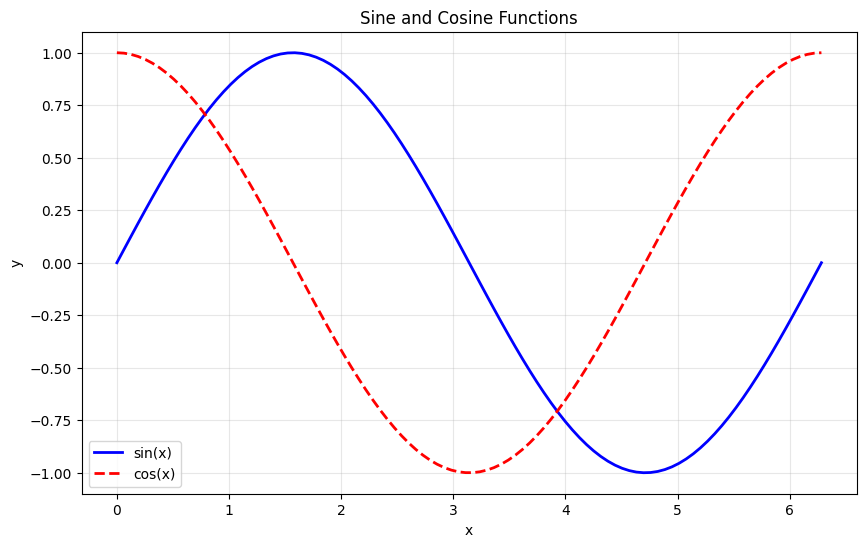

Plot generated successfully!


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib

# Suppress matplotlib font warnings for cleaner output
warnings.filterwarnings('ignore', message='findfont: Generic family')
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Use available fallback font

# Create data
x = np.linspace(0, 2 * np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_sin, 'b-', label='sin(x)', linewidth=2)
plt.plot(x, y_cos, 'r--', label='cos(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine Functions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Plot generated successfully!")

#### `pandas`-only example

In [31]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
  'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
  'Age': [25, 30, 35, 28, 32],
  'Score': [85, 92, 78, 91, 88],
  'Department': ['IT', 'HR', 'IT', 'Finance', 'HR']
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("\n" + "="*50 + "\n")

# Basic statistics
print("Statistics:")
print(df.describe())
print("\n" + "="*50 + "\n")

# Group by department
print("Average score by department:")
dept_avg = df.groupby('Department')['Score'].mean()
print(dept_avg)

Original DataFrame:
      Name  Age  Score Department
0    Alice   25     85         IT
1      Bob   30     92         HR
2  Charlie   35     78         IT
3    David   28     91    Finance
4      Eve   32     88         HR


Statistics:
             Age      Score
count   5.000000   5.000000
mean   30.000000  86.800000
std     3.807887   5.630275
min    25.000000  78.000000
25%    28.000000  85.000000
50%    30.000000  88.000000
75%    32.000000  91.000000
max    35.000000  92.000000


Average score by department:
Department
Finance    91.0
HR         90.0
IT         81.5
Name: Score, dtype: float64


#### `pandas` + `matplotlib` time series example

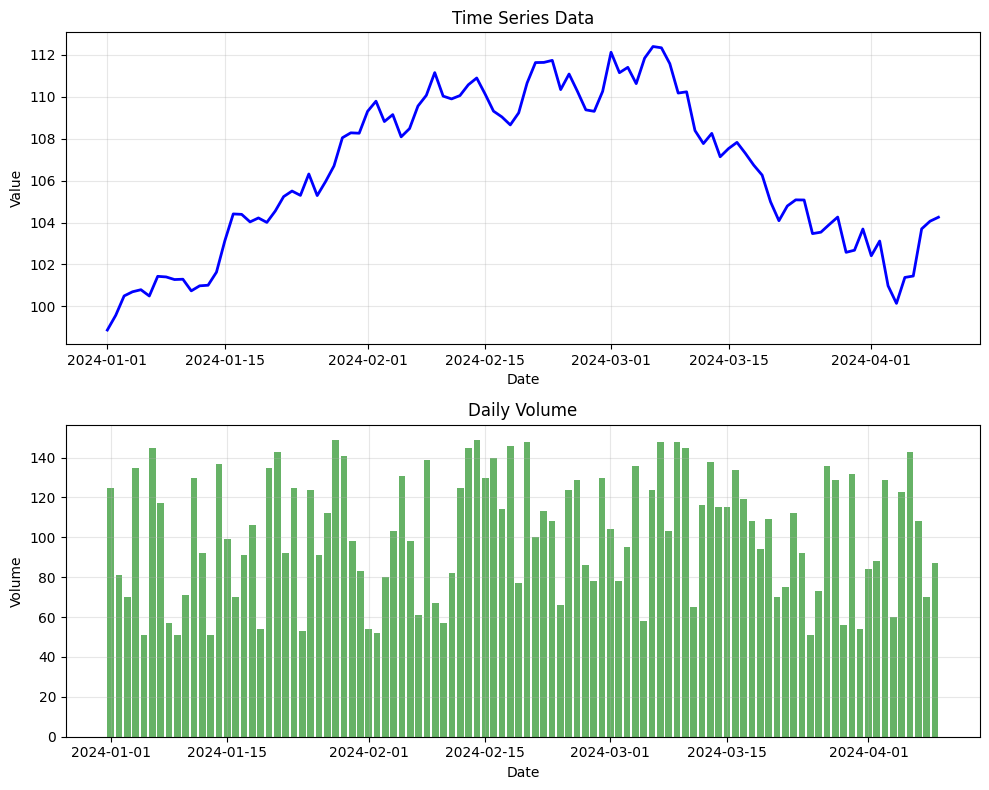

Data shape: (100, 3)
Date range: 2024-01-01 00:00:00 to 2024-04-09 00:00:00
Value range: 98.87 to 112.40


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib

# Suppress matplotlib font warnings for cleaner output
warnings.filterwarnings('ignore', message='findfont: Generic family')
matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Use available fallback font

# Create sample time series data
dates = pd.date_range('20240101', periods=100)
df = pd.DataFrame({
  'date': dates,
  'value': np.random.randn(100).cumsum() + 100,
  'volume': np.random.randint(50, 150, 100)
})

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot time series
ax1.plot(df['date'], df['value'], 'b-', linewidth=2)
ax1.set_title('Time Series Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid(True, alpha=0.3)

# Plot volume bars
ax2.bar(df['date'], df['volume'], color='green', alpha=0.6)
ax2.set_title('Daily Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Data shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Value range: {df['value'].min():.2f} to {df['value'].max():.2f}")

### `bokeh` interactive plots

#### 🔴 Bokeh Interactive Plot Example for `pm-codex`
🚨 This example won't work here (no error but no display) - because it's not the right syntax for notebooks

In [39]:
# 🚀 ORIGINAL VERSION - Works with your Pyodide wrapper
# 📦 Import Bokeh plotting + document
from bokeh.plotting import figure, curdoc  
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations     
import numpy as np                          

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title: `title` argument
# 📏 Plot width in pixels: `width` argument
# 📏 Plot height in pixels: `height` argument
# 🛠️ Interactive tools available: `tools` argument
p = figure(
    title="Interactive Sine Wave - Try zooming and panning!",  
    width=600,                             
    height=400,                           
    tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)      

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"                   
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"             
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot in document (`pm-codex`): `curdoc().add_root(p)`
curdoc().add_root(p)                       

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")


✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


In [40]:
#### 🟢 Bokeh Interactive Plot Example for `Jupyter`

In [41]:
# 📚 JUPYTER VERSION - Works in standard JupyterLab
# 📦 Import plotting + show function
from bokeh.plotting import figure, show   
# ❌ OLD: curdoc not needed for Jupyter
# from bokeh.plotting import figure, curdoc 
# ✨ NEW: Enable notebook output mode
from bokeh.io import output_notebook    
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations
import numpy as np                          

# 🔧 CRITICAL: Specific NOTEBOOK: Enable Jupyter notebook display mode
# ✨ Specific NOTEBOOK: Tell Bokeh to render in notebook cells
output_notebook()                           

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title
# 📏 Plot width in pixels
# 📏 Plot height in pixels
# 🛠️ Interactive tools available
p = figure(
    title="Interactive Sine Wave - Try zooming and panning!",  
    width=600,                             
    height=400,                            
    tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)       

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"        
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"       
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot (Jupyter method)
# ✨ NEW: Specific NOTEBOOK: Display plot directly in cell output
show(p)        
# ❌ OLD: Not needed for Jupyter
# curdoc().add_root(p)                     

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

Loading BokehJS ...

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


In [26]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import numpy as np

# Enable notebook output
output_notebook()

# Create simple data
x = [1, 2, 3, 4, 5]
y = [2, 5, 3, 8, 7]

# Create plot
p = figure(
    title="Depreciation Warning Demo",
    width=400, 
    height=300,
    tools="pan,wheel_zoom,reset"
)

# Add circles
p.circle(x, y, size=15, color='red', alpha=0.6)

# Display in notebook
show(p)

Loading BokehJS ...

## `bokeh` interactive plots

### 🔴 Working example (for `pm-codex`)

In [44]:
# 🚀 ORIGINAL VERSION - Works with your Pyodide wrapper
# 📦 Import Bokeh plotting + document
from bokeh.plotting import figure, curdoc  
# 🎯 Import hover functionality
from bokeh.models import HoverTool     
# 🔢 Import numerical operations     
import numpy as np                          

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title: `title` argument
# 📏 Plot width in pixels: `width` argument
# 📏 Plot height in pixels: `height` argument
# 🛠️ Interactive tools available: `tools` argument
p = figure(
  title="Interactive Sine Wave - Try zooming and panning!",  
  width=600,                             
  height=400,                           
  tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)      

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"                   
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"             
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot in document (`pm-codex`): `curdoc().add_root(p)`
curdoc().add_root(p)                       

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!


### 🟢 Working example (for `jupyter`)

In [45]:
# 📚 JUPYTER VERSION - Works in standard JupyterLab
# 📦 Import plotting + show function
from bokeh.plotting import figure, show   
# ❌ OLD: curdoc not needed for Jupyter
# from bokeh.plotting import figure, curdoc 
# ✨ NEW: Enable notebook output mode
from bokeh.io import output_notebook    
# 🎯 Import hover functionality
from bokeh.models import HoverTool   

# 🔢 Import numerical operations
import numpy as np                          

# 🔧 CRITICAL: Specific NOTEBOOK: Enable Jupyter notebook display mode
# ✨ Specific NOTEBOOK: Tell Bokeh to render in notebook cells
output_notebook()                           

# 🔢 100 points from 0 to 4π (2 sine cycles)
x = np.linspace(0, 4*np.pi, 100)           
# 📈 Calculate sine values for each x
y = np.sin(x)                              

# 📝 Plot title
# 📏 Plot width in pixels
# 📏 Plot height in pixels
# 🛠️ Interactive tools available
p = figure(
  title="Interactive Sine Wave - Try zooming and panning!",  
  width=600,                             
  height=400,                            
  tools="pan,wheel_zoom,box_zoom,reset"  
)

# 📊 Blue sine curve
p.line(x, y, legend_label="sin(x)", line_width=2, color='navy')  
# 🔴 Red dots every 5th point
p.scatter(x[::5], y[::5], size=8, color='red', alpha=0.5)       

# 💬 Add hover functionality: show coordinates on hover
hover = HoverTool(tooltips=[("(x,y)", "($x, $y)")])  
# ➕ Add hover tool to plot
p.add_tools(hover)                         

# 🎨 Customize plot appearance
# 📊 X-axis label
p.xaxis.axis_label = "x"        
# 📊 Y-axis label
p.yaxis.axis_label = "sin(x)"       
# 👁️ Click legend to hide/show lines
p.legend.click_policy = "hide"             

# 📺 Display plot (Jupyter method)
# ✨ NEW: Specific NOTEBOOK: Display plot directly in cell output
show(p)        
# ❌ OLD: Not needed for Jupyter
# curdoc().add_root(p)                     

# 📢 Success messages
print("✅ Interactive Bokeh plot created!")
print("🎯 Use mouse to pan, scroll to zoom, hover for values!")

Loading BokehJS ...

✅ Interactive Bokeh plot created!
🎯 Use mouse to pan, scroll to zoom, hover for values!
